##### For Text Mining assignment

1) Extract reviews of any product from ecommerce website like amazon  
2) Perform emotion mining  

- Using "Amazon Review Extractor" extension I have collected ratings and reviews of product "boAt Airdopes 141" from Amazon.
- URL - "https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_getr_d_paging_btm_next_501?ie=UTF8&reviewerType=all_reviews&pageNumber=501"

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

In [2]:
# Data Collection

boat = pd.read_excel('Amazon-reivew-export.xlsx')
boat

,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date
0,4.0 out of 5 stars,Brahad Kokad,https://www.amazon.in/gp/customer-reviews/R3B8...,Bang for your buck,"This is not a review for the sake of it, I'm w...",https://m.media-amazon.com/images/W/WEBP_40237...,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 17 September 2021
1,2.0 out of 5 stars,Gaurav,https://www.amazon.in/gp/customer-reviews/R1SM...,Sound is good but,It has LED on both earplugs which is annoying ...,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 24 October 2022
2,3.0 out of 5 stars,Srishty Roy,https://www.amazon.in/gp/customer-reviews/RT87...,Not good,I want to change the product we have 1 year wa...,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 29 August 2022
3,4.0 out of 5 stars,Abhi,https://www.amazon.in/gp/customer-reviews/R1B1...,Better,1000 worth,https://m.media-amazon.com/images/W/WEBP_40237...,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 5 August 2022
4,4.0 out of 5 stars,Revanth S,https://www.amazon.in/gp/customer-reviews/R3ID...,..,I really liked the product a good product wort...,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 21 July 2022
...,...,...,...,...,...,...,...,...
2105,5.0 out of 5 stars,Angelachinzah,https://www.amazon.in/gp/customer-reviews/R33Y...,Worth the purchase,It's a convenient little device,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 8 October 2022
2106,3.0 out of 5 stars,Dulal Bhandari,https://www.amazon.in/gp/customer-reviews/RB41...,Good,Good performance,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 18 July 2022
2107,1.0 out of 5 stars,Arpan Paul,https://www.amazon.in/gp/customer-reviews/R309...,Reviewing after 6 months of continuous usage ...,Under Rs. 1400.00 this is neither bad nor good...,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 26 October 2022
2108,2.0 out of 5 stars,Varun,https://www.amazon.in/gp/customer-reviews/RUSY...,Just ok for calling,Just ok... U can fill better ones..,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 30 October 2022


In [3]:
boat.isna().sum()

Star-rating                0
Name                       0
Reviewer Profile Url       0
Review Title               0
Review Content           106
images                  1629
profile icon               0
Date                       0
dtype: int64

In [4]:
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Star-rating           2110 non-null   object
 1   Name                  2110 non-null   object
 2   Reviewer Profile Url  2110 non-null   object
 3   Review Title          2110 non-null   object
 4   Review Content        2004 non-null   object
 5   images                481 non-null    object
 6   profile icon          2110 non-null   object
 7   Date                  2110 non-null   object
dtypes: object(8)
memory usage: 132.0+ KB


In [5]:
boat.columns

Index(['Star-rating', 'Name', 'Reviewer Profile Url', 'Review Title',
       'Review Content', 'images', 'profile icon', 'Date'],
      dtype='object')

In [6]:
df = boat.drop(['Name', 'Reviewer Profile Url', 'images', 'profile icon', 'Date'], axis = 1)
df

,Star-rating,Review Title,Review Content
0,4.0 out of 5 stars,Bang for your buck,"This is not a review for the sake of it, I'm w..."
1,2.0 out of 5 stars,Sound is good but,It has LED on both earplugs which is annoying ...
2,3.0 out of 5 stars,Not good,I want to change the product we have 1 year wa...
3,4.0 out of 5 stars,Better,1000 worth
4,4.0 out of 5 stars,..,I really liked the product a good product wort...
...,...,...,...
2105,5.0 out of 5 stars,Worth the purchase,It's a convenient little device
2106,3.0 out of 5 stars,Good,Good performance
2107,1.0 out of 5 stars,Reviewing after 6 months of continuous usage ...,Under Rs. 1400.00 this is neither bad nor good...
2108,2.0 out of 5 stars,Just ok for calling,Just ok... U can fill better ones..


In [7]:
# Creating a new column, that is a combination of the review title and the reviews, since both are texts those complement each other

df['text']=df['Review Title']+' '+df['Review Content']
df

,Star-rating,Review Title,Review Content,text
0,4.0 out of 5 stars,Bang for your buck,"This is not a review for the sake of it, I'm w...",Bang for your buck This is not a review for t...
1,2.0 out of 5 stars,Sound is good but,It has LED on both earplugs which is annoying ...,Sound is good but It has LED on both earplugs...
2,3.0 out of 5 stars,Not good,I want to change the product we have 1 year wa...,Not good I want to change the product we have...
3,4.0 out of 5 stars,Better,1000 worth,Better 1000 worth
4,4.0 out of 5 stars,..,I really liked the product a good product wort...,.. I really liked the product a good product ...
...,...,...,...,...
2105,5.0 out of 5 stars,Worth the purchase,It's a convenient little device,Worth the purchase It's a convenient little d...
2106,3.0 out of 5 stars,Good,Good performance,Good Good performance
2107,1.0 out of 5 stars,Reviewing after 6 months of continuous usage ...,Under Rs. 1400.00 this is neither bad nor good...,Reviewing after 6 months of continuous usage ...
2108,2.0 out of 5 stars,Just ok for calling,Just ok... U can fill better ones..,Just ok for calling Just ok... U can fill bet...


In [8]:
#Load Stop words

stop = pd.read_csv('stop.txt',encoding = 'latin-1')
stop

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [9]:
df.describe()

,Star-rating,Review Title,Review Content,text
count,2110,2110,2004,2004
unique,5,1630,1777,1917
top,5.0 out of 5 stars,Good,Good,Good Good
freq,862,99,69,40


In [10]:
# Remove all types of punctuations, numbers, special characters and lowerletters

import re
import string

re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(text):
    text = re.sub('[0-9]', '', str(text))
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub('_', '', text.lower())
    text = re_without_space.sub('', text)
    text = re_with_space.sub(' ', text)
    return text

df['clean1'] = df['text'].apply(cleantext)
df

,Star-rating,Review Title,Review Content,text,clean1
0,4.0 out of 5 stars,Bang for your buck,"This is not a review for the sake of it, I'm w...",Bang for your buck This is not a review for t...,bang for your buck this is not a review for t...
1,2.0 out of 5 stars,Sound is good but,It has LED on both earplugs which is annoying ...,Sound is good but It has LED on both earplugs...,sound is good but it has led on both earplugs...
2,3.0 out of 5 stars,Not good,I want to change the product we have 1 year wa...,Not good I want to change the product we have...,not good i want to change the product we have...
3,4.0 out of 5 stars,Better,1000 worth,Better 1000 worth,better worth
4,4.0 out of 5 stars,..,I really liked the product a good product wort...,.. I really liked the product a good product ...,i really liked the product a good product wo...
...,...,...,...,...,...
2105,5.0 out of 5 stars,Worth the purchase,It's a convenient little device,Worth the purchase It's a convenient little d...,worth the purchase its a convenient little de...
2106,3.0 out of 5 stars,Good,Good performance,Good Good performance,good good performance
2107,1.0 out of 5 stars,Reviewing after 6 months of continuous usage ...,Under Rs. 1400.00 this is neither bad nor good...,Reviewing after 6 months of continuous usage ...,reviewing after months of continuous usage e...
2108,2.0 out of 5 stars,Just ok for calling,Just ok... U can fill better ones..,Just ok for calling Just ok... U can fill bet...,just ok for calling just ok u can fill better...


In [11]:
def thorough_clean(text):
    text = re.sub('[^A-Za-z0-9]', ' ',text)
    return(text)
df['clean1'] = df['clean1'].apply(thorough_clean)
df

,Star-rating,Review Title,Review Content,text,clean1
0,4.0 out of 5 stars,Bang for your buck,"This is not a review for the sake of it, I'm w...",Bang for your buck This is not a review for t...,bang for your buck this is not a review for t...
1,2.0 out of 5 stars,Sound is good but,It has LED on both earplugs which is annoying ...,Sound is good but It has LED on both earplugs...,sound is good but it has led on both earplugs...
2,3.0 out of 5 stars,Not good,I want to change the product we have 1 year wa...,Not good I want to change the product we have...,not good i want to change the product we have...
3,4.0 out of 5 stars,Better,1000 worth,Better 1000 worth,better worth
4,4.0 out of 5 stars,..,I really liked the product a good product wort...,.. I really liked the product a good product ...,i really liked the product a good product wo...
...,...,...,...,...,...
2105,5.0 out of 5 stars,Worth the purchase,It's a convenient little device,Worth the purchase It's a convenient little d...,worth the purchase its a convenient little de...
2106,3.0 out of 5 stars,Good,Good performance,Good Good performance,good good performance
2107,1.0 out of 5 stars,Reviewing after 6 months of continuous usage ...,Under Rs. 1400.00 this is neither bad nor good...,Reviewing after 6 months of continuous usage ...,reviewing after months of continuous usage e...
2108,2.0 out of 5 stars,Just ok for calling,Just ok... U can fill better ones..,Just ok for calling Just ok... U can fill bet...,just ok for calling just ok u can fill better...


In [12]:
#Word frequency of tweets

Freq_tweets = pd.Series(' '.join(df['clean1']).split()).value_counts()[:20]
Freq_tweets

is         1683
good       1619
the        1405
quality    1026
and        1006
product     975
it          896
for         893
i           880
sound       811
not         809
to          699
this        680
but         592
in          590
a           496
very        483
of          475
its         407
nice        385
dtype: int64

In [13]:
#clean stop words data

stop = [x.strip() for x in stop] # remove both the leading and the trailing characters
stop = [x for x in stop if x] # removes empty strings, because they are considered in Python as False
stop[0:10]

['a']

In [14]:
import nltk

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [15]:
from nltk.corpus import stopwords

In [16]:
df1 = df.copy()

In [17]:
df1['clean1'] = df['clean1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df1

,Star-rating,Review Title,Review Content,text,clean1
0,4.0 out of 5 stars,Bang for your buck,"This is not a review for the sake of it, I'm w...",Bang for your buck This is not a review for t...,bang for your buck this is not review for the ...
1,2.0 out of 5 stars,Sound is good but,It has LED on both earplugs which is annoying ...,Sound is good but It has LED on both earplugs...,sound is good but it has led on both earplugs ...
2,3.0 out of 5 stars,Not good,I want to change the product we have 1 year wa...,Not good I want to change the product we have...,not good i want to change the product we have ...
3,4.0 out of 5 stars,Better,1000 worth,Better 1000 worth,better worth
4,4.0 out of 5 stars,..,I really liked the product a good product wort...,.. I really liked the product a good product ...,i really liked the product good product worth ...
...,...,...,...,...,...
2105,5.0 out of 5 stars,Worth the purchase,It's a convenient little device,Worth the purchase It's a convenient little d...,worth the purchase its convenient little device
2106,3.0 out of 5 stars,Good,Good performance,Good Good performance,good good performance
2107,1.0 out of 5 stars,Reviewing after 6 months of continuous usage ...,Under Rs. 1400.00 this is neither bad nor good...,Reviewing after 6 months of continuous usage ...,reviewing after months of continuous usage eve...
2108,2.0 out of 5 stars,Just ok for calling,Just ok... U can fill better ones..,Just ok for calling Just ok... U can fill bet...,just ok for calling just ok u can fill better ...


In [18]:
# Word frequency after removal of stopwords

freq_cleaned = pd.Series(' '.join(df['clean1']).split()).value_counts()[:20]
freq_cleaned

is         1683
good       1619
the        1405
quality    1026
and        1006
product     975
it          896
for         893
i           880
sound       811
not         809
to          699
this        680
but         592
in          590
a           496
very        483
of          475
its         407
nice        385
dtype: int64

In [19]:
# Count vectorizer also tell us the frequency and occurences of word

from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df['clean1'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

C:\Users\imjma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

         term  occurrences  frequency
1616       is         1683   0.037093
1337     good         1619   0.035683
3136      the         1405   0.030966
2528  quality         1026   0.022613
164       and         1006   0.022172


In [21]:
# TFIDF - Term frequency inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(df['clean1'])

names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()

df2 = pd.DataFrame(denselist, columns = names_features)

C:\Users\imjma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
df2

,ab,able,absolute,absolutely,accha,accidentally,according,acha,achcha,ache,...,yeah,year,years,yes,yesterday,youll,youre,youtube,zing,zoom
0,0.0,0.0,0.124516,0.0,0.0,0.127824,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.113519,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.51925,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2106,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2107,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.155808,0.0,0.0,0.0,0.0
2108,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [23]:
# Bi-gram

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [24]:
Top2_words = get_top_n2_words(df['clean1'], n=200)
Top2_df = pd.DataFrame(Top2_words)
Top2_df.columns=["Bi-gram", "Freq"]
Top2_df.head()

,Bi-gram,Freq
0,sound quality,448
1,quality is,302
2,is good,257
3,is not,242
4,good product,197


Text(0.5, 1.05, 'Most two words used together by the customers')

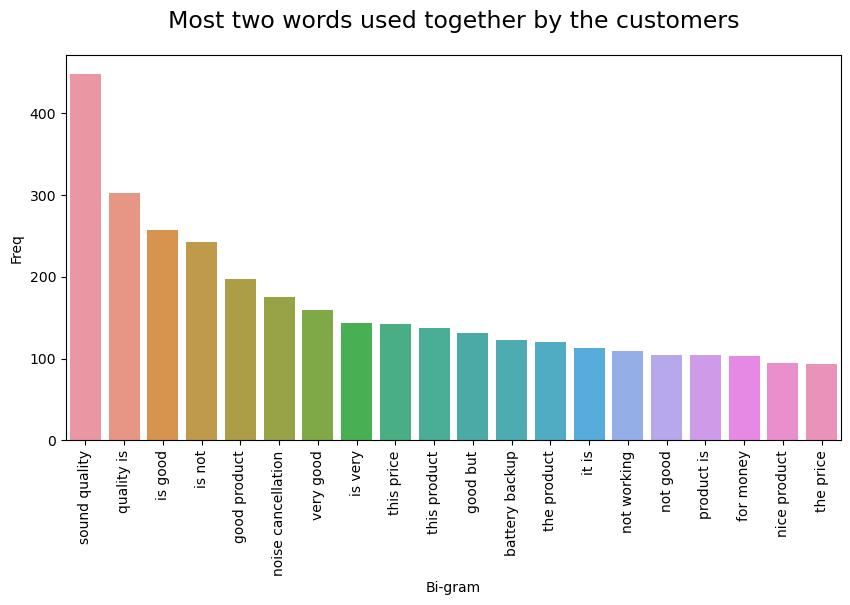

In [25]:
# Bi-gram plot

import matplotlib.pyplot as plt
import seaborn as sns

Top20_bigram = Top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=Top20_bigram["Bi-gram"],y=Top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = Top20_bigram["Bi-gram"])
plt.title("Most two words used together by the customers", y=1.05, fontsize=17)

In [26]:
#Tri-gram

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
Top3_words = get_top_n3_words(df['clean1'], n=200)
Top3_df = pd.DataFrame(Top3_words)
Top3_df.columns=["Tri-gram", "Freq"]
Top3_df.head()

,Tri-gram,Freq
0,sound quality is,163
1,value for money,77
2,quality is good,72
3,good sound quality,59
4,in this price,56


Text(0.5, 1.05, 'Most three words used together by the customers')

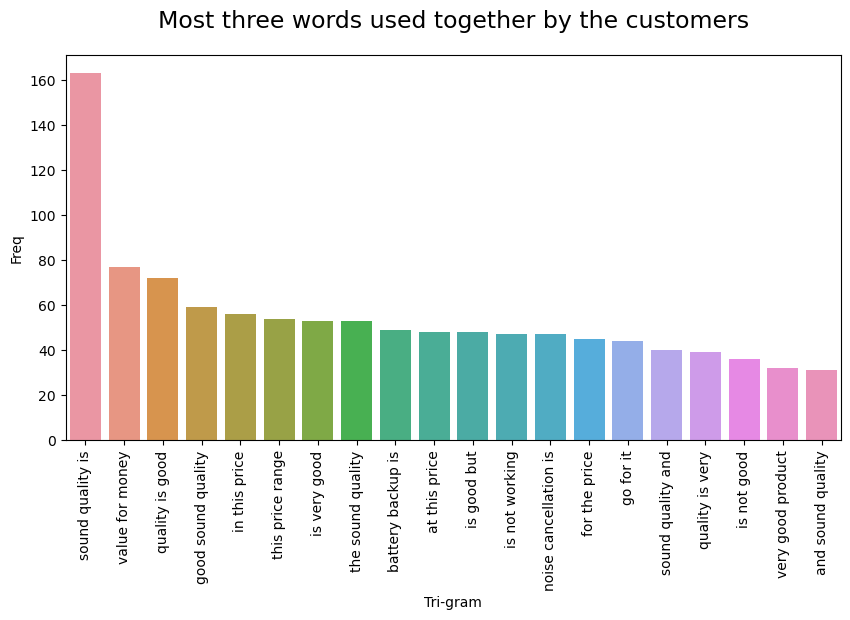

In [28]:
top20_trigram = Top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])
plt.title("Most three words used together by the customers", y=1.05, fontsize=17)

In [29]:
from collections import Counter

top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df['Review Content'].str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split())

words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

words_data

,Frequency
Word,
good,864
quality,684
sound,593
',550
product,510
...,...
cannot,13
big,12
"sound,",12


In [30]:
# Wordcloud for entire corpus

from wordcloud import WordCloud

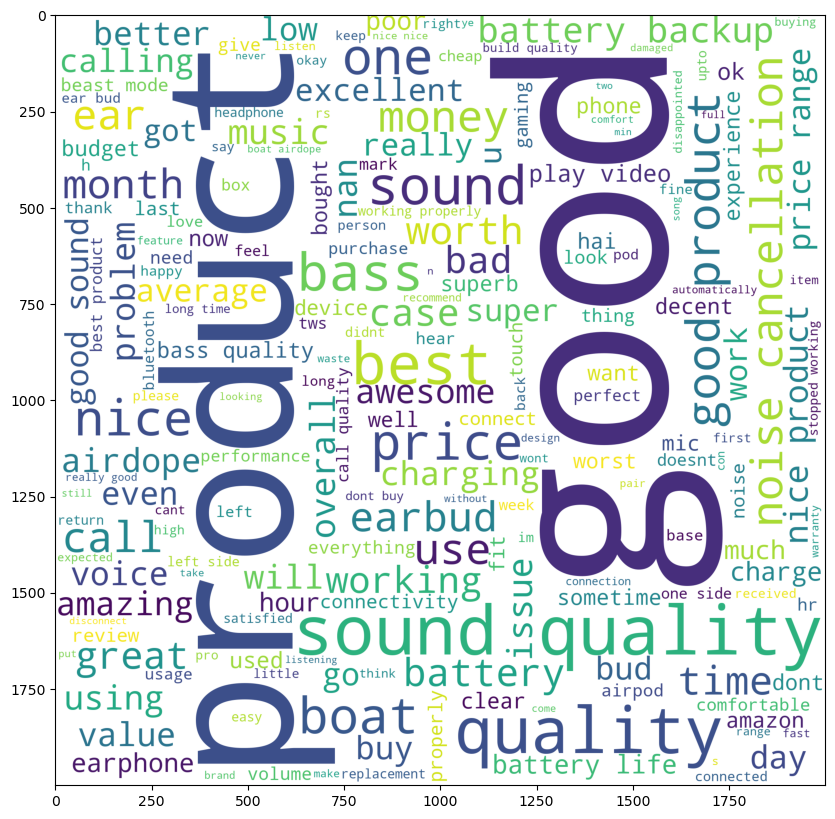

In [31]:
Review_wordcloud = ' '.join(df['clean1'])
Q_wordcloud=WordCloud(background_color='white', width=2000, height=2000).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [32]:
!pip install spacy

In [33]:
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 386, in _make_request
   

In [34]:
#Named Entity Recognition

import string #special operations on strings
import spacy #language models

In [35]:
nlp = spacy.load('en_core_web_sm')

one_block = df['clean1'].iloc[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter = True)

In [36]:
for token in doc_block:
    print(token, token.pos_)

  SPACE
good ADJ
quality NOUN
sound NOUN
nice ADJ
sound ADJ
quality NOUN
good ADJ
bass NOUN
in ADP
this DET
price NOUN
overall ADJ
experience NOUN
of ADP
one NUM
month NOUN
is AUX
good ADJ
spl NOUN
for ADP
movies NOUN
but CCONJ
little ADJ
disappointing ADJ
for ADP
quality NOUN
music NOUN


In [37]:
# Filtering for nouns and verbs only

noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(noun_verbs)

['quality', 'sound', 'quality', 'bass', 'price', 'experience', 'month', 'spl', 'movies', 'quality', 'music']


In [38]:
# Counting tokens again

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(noun_verbs)
sum_words = X.sum(axis=0)
words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df[0:10]

,word,count
0,quality,3
1,sound,1
2,bass,1
3,price,1
4,experience,1
5,month,1
6,spl,1
7,movies,1
8,music,1


In [39]:
one_block1 = df['clean1'].loc[4]
doc_block1 = nlp(one_block1)
spacy.displacy.render(doc_block1, style='ent', jupyter=True)

C:\Users\imjma\anaconda3\lib\site-packages\spacy\displacy\__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [40]:
for token in doc_block1:
    print(token, token.pos_)

   SPACE
i PRON
really ADV
liked VERB
the DET
product NOUN
a DET
good ADJ
product NOUN
worth ADJ
for ADP
me PRON
for ADP
the DET
amount NOUN


In [41]:
#Filtering for nouns and verbs only

noun_verbs = [token.text for token in doc_block1 if token.pos_ in ('NOUN', 'VERB')]
print(noun_verbs)

['liked', 'product', 'product', 'amount']


##### Sentiment Analysis

In [42]:
!pip install textblob

In [43]:
# Create function to get subjective and polarity of tweets

from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def getanalysis(score):
  if score <= 0:
    return 'Negative'
  elif score > 0:
      return 'Positive'

df1['subjectivity'] = df['clean1'].apply(get_subjectivity)
df1['polarity'] = df['clean1'].apply(get_polarity)
df1['Analysis'] = df1['polarity'].apply(getanalysis) 

df1

,Star-rating,Review Title,Review Content,text,clean1,subjectivity,polarity,Analysis
0,4.0 out of 5 stars,Bang for your buck,"This is not a review for the sake of it, I'm w...",Bang for your buck This is not a review for t...,bang for your buck this is not review for the ...,0.577690,0.209829,Positive
1,2.0 out of 5 stars,Sound is good but,It has LED on both earplugs which is annoying ...,Sound is good but It has LED on both earplugs...,sound is good but it has led on both earplugs ...,0.582403,0.259338,Positive
2,3.0 out of 5 stars,Not good,I want to change the product we have 1 year wa...,Not good I want to change the product we have...,not good i want to change the product we have ...,0.600000,-0.350000,Negative
3,4.0 out of 5 stars,Better,1000 worth,Better 1000 worth,better worth,0.300000,0.400000,Positive
4,4.0 out of 5 stars,..,I really liked the product a good product wort...,.. I really liked the product a good product ...,i really liked the product good product worth ...,0.500000,0.533333,Positive
...,...,...,...,...,...,...,...,...
2105,5.0 out of 5 stars,Worth the purchase,It's a convenient little device,Worth the purchase It's a convenient little d...,worth the purchase its convenient little device,0.300000,0.056250,Positive
2106,3.0 out of 5 stars,Good,Good performance,Good Good performance,good good performance,0.600000,0.700000,Positive
2107,1.0 out of 5 stars,Reviewing after 6 months of continuous usage ...,Under Rs. 1400.00 this is neither bad nor good...,Reviewing after 6 months of continuous usage ...,reviewing after months of continuous usage eve...,0.306019,0.113889,Positive
2108,2.0 out of 5 stars,Just ok for calling,Just ok... U can fill better ones..,Just ok for calling Just ok... U can fill bet...,just ok for calling just ok u can fill better ...,0.500000,0.500000,Positive


In [44]:
# Print all positive tweets from most positive to least positive

positive_tweets = df1[df1['Analysis'] == 'Positive']
positive_tweets = positive_tweets.sort_values('polarity', ascending = False)
positive_tweets

,Star-rating,Review Title,Review Content,text,clean1,subjectivity,polarity,Analysis
1266,4.0 out of 5 stars,Superb in all,Quality product,Superb in all Quality product,superb in all quality product,1.000000,1.000000e+00,Positive
1743,5.0 out of 5 stars,best for this price,just go for it :),best for this price just go for it :),best for this price just go for it,0.300000,1.000000e+00,Positive
775,5.0 out of 5 stars,Excellent Audio Quality,Excellent Audio Quality,Excellent Audio Quality Excellent Audio Quality,excellent audio quality excellent audio quality,1.000000,1.000000e+00,Positive
942,5.0 out of 5 stars,Boat 141 review,NYC product.... Best... 5 ratting agar. 6 hoti...,Boat 141 review NYC product.... Best... 5 rat...,boat review nyc product best ratting agar hoti...,0.300000,1.000000e+00,Positive
122,5.0 out of 5 stars,Best.,Bestest earbuds under a budget👍👍,Best. Bestest earbuds under a budget👍👍,best bestest earbuds under budget,0.300000,1.000000e+00,Positive
...,...,...,...,...,...,...,...,...
207,2.0 out of 5 stars,"Works well when it works, works terribly when...","First off, the sound quality is good given the...","Works well when it works, works terribly when...",works well when it works works terribly when i...,0.403704,5.555556e-03,Positive
1131,3.0 out of 5 stars,Sound is good but the battery back up is vere...,Battery backup is very bad and the charging bo...,Sound is good but the battery back up is vere...,sound is good but the battery back up is vere ...,0.528000,5.000000e-03,Positive
1759,3.0 out of 5 stars,Missing boat quality.,Bass is not good compared to my previous boat ...,Missing boat quality. Bass is not good compar...,missing boat quality bass is not good compared...,0.519697,3.030303e-03,Positive
372,4.0 out of 5 stars,"Bad experience on video and audio call, I tri...",Listen songs and movie are good experience.,"Bad experience on video and audio call, I tri...",bad experience on video and audio call i tried...,0.633333,5.551115e-17,Positive


In [45]:
# Print all negative tweets from most negative to least negative

negative_tweets = df1[df1['Analysis'] == 'Negative']
negative_tweets = negative_tweets.sort_values('polarity', ascending = True)
negative_tweets

,Star-rating,Review Title,Review Content,text,clean1,subjectivity,polarity,Analysis
1851,3.0 out of 5 stars,Mic quality,Worst for calling. It captures surrounding noi...,Mic quality Worst for calling. It captures su...,mic quality worst for calling it captures surr...,1.0,-1.0,Negative
814,3.0 out of 5 stars,Not for calling,Worst for calling purpose,Not for calling Worst for calling purpose,not for calling worst for calling purpose,1.0,-1.0,Negative
2009,2.0 out of 5 stars,Within days of purchase it stopped working......,Worst quality as it stopped working within 10 ...,Within days of purchase it stopped working......,within days of purchase it stopped working wor...,1.0,-1.0,Negative
60,3.0 out of 5 stars,While listening to music it was not performin...,"Worst music quality, calling purpose was done ...",While listening to music it was not performin...,while listening to music it was not performing...,1.0,-1.0,Negative
1975,3.0 out of 5 stars,Nothing,Worst facilities,Nothing Worst facilities,nothing worst facilities,1.0,-1.0,Negative
...,...,...,...,...,...,...,...,...
1304,4.0 out of 5 stars,That is the thardclass product,Play Video\n That is the thardclass bladdy pro...,That is the thardclass product Play Video\n T...,that is the thardclass product play video that...,0.0,0.0,Negative
232,5.0 out of 5 stars,Kharab ho gaya hai please help me,Play Video\n Pasand nhi kharab ho gya hai please,Kharab ho gaya hai please help me Play Video\...,kharab ho gaya hai please help me play video p...,0.0,0.0,Negative
121,5.0 out of 5 stars,Good quality,NaN,NaN,nan,0.0,0.0,Negative
553,3.0 out of 5 stars,Boat,Play Video\n Calling not,Boat Play Video\n Calling not,boat play video calling not,0.0,0.0,Negative


- Even though the given rating is 5, we can see some of the analysis showing negative.
- This is because Analysis is done based on the "Review Title" + "Review Content" and the customer has not given any comments.

In [46]:
#Get % of positive, negative, neutral tweets

print("Positive review:", round((positive_tweets.shape[0]/df1.shape[0])*100, 1),'%')
print("Negative review:", round((negative_tweets.shape[0]/df1.shape[0])*100, 1),'%')

Positive review: 77.9 %
Negative review: 22.1 %


##### Conclusion

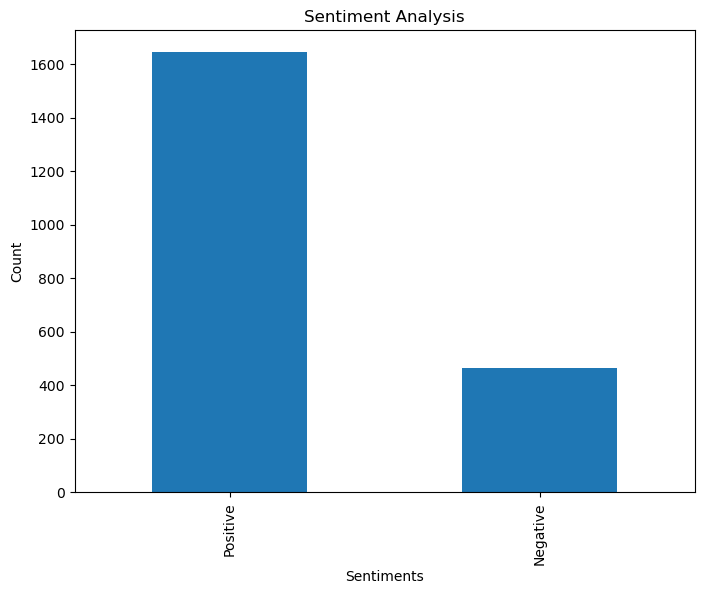

In [47]:
plt.figure(figsize=(8,6))
df1['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

- It is clear that there are more customers satisfied by the product.